<a href="https://colab.research.google.com/github/bellgacem23/The_Spark_Foundation_Intern_tasks/blob/main/Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THE SPARKS FOUNDATION DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP
##Name: Belgacem CHAIBI
Grip April 2024 Batch

# **Task 2-Prediction Using Unsupervised ML**


#🔬 Problem Definition ✅ 🏁

**Objective:
The main goal of this project is to apply unsupervised learning, specifically K-means clustering, to the Iris dataset with the optimal number of clusters .**

## ✅ Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#📥 Load the data

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## ▶ Check missing values

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## ▶ Checking Descriptive Statistics


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


No Null Value is Found ✅

In [7]:
# Class distribution (for labeled datasets)
class_distribution = data['Species'].value_counts()
print("\nClass Distribution:\n", class_distribution)


Class Distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## **Determine the Optimal Number of Clusters (K)**

**In this step, we will use the Elbow Method to find the optimal number of clusters (K) for K-means clustering.**

In [8]:
# Extract the feature columns (exclude the 'Id' and 'Species' columns)
X = data.iloc[:, [1, 2, 3, 4]].values

# Initialize an empty list to store the WCSS values for different K values
wcss = []

import warnings

# Filter out the specific warning related to KMeans memory leak
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")


# Determine the optimal number of clusters (K) using the Elbow Method
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

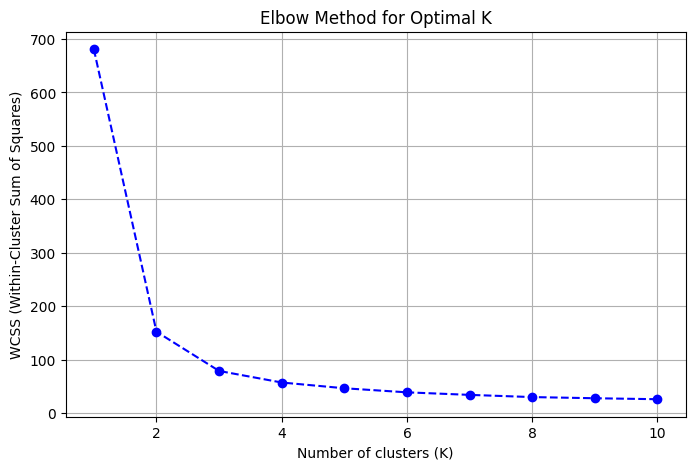

In [9]:

# Create an array of K values (from 1 to 10)
k_values = range(1, 11)

# Plot the Elbow Method curve
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

## **Perform K-Means Clustering with Optimal K**

In this step, we will perform K-means clustering using the optimal number of clusters (K=3) that we determined using the Elbow Method. We'll fit the K-means model to the data and assign each data point to a cluster.


In [11]:
# Use the actual optimal K value obtained from the Elbow Method (e.g., K=3)
optimal_k = 3

# Initialize the K-means model with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the K-means model to the data
kmeans.fit(X)

# Add a new column 'Cluster' to the dataset indicating the cluster assignment for each data point
data['Cluster'] = kmeans.labels_

# Display the first few rows of the dataset with the 'Cluster' column
data.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [13]:
data.tail(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
143,144,6.8,3.2,5.9,2.3,Iris-virginica,2
144,145,6.7,3.3,5.7,2.5,Iris-virginica,2
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,0


# 🖼 **Analysis & Visualization**

In [15]:
# 1. Cluster Size Analysis
cluster_sizes = data['Cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
Cluster
0    62
1    50
2    38
Name: count, dtype: int64


In [17]:
# 2. Cluster Statistics
cluster_stats = data.groupby('Cluster').agg({
    'SepalLengthCm': ['mean', 'median', 'std'],
    'SepalWidthCm': ['mean', 'median', 'std'],
    'PetalLengthCm': ['mean', 'median', 'std'],
    'PetalWidthCm': ['mean', 'median', 'std'],
}).round(2)
print("\nCluster Statistics:")
print(cluster_stats)


Cluster Statistics:
        SepalLengthCm              SepalWidthCm              PetalLengthCm  \
                 mean median   std         mean median   std          mean   
Cluster                                                                      
0                5.90    5.9  0.47         2.75    2.8  0.30          4.39   
1                5.01    5.0  0.35         3.42    3.4  0.38          1.46   
2                6.85    6.7  0.49         3.07    3.0  0.29          5.74   

                     PetalWidthCm               
        median   std         mean median   std  
Cluster                                         
0         4.50  0.51         1.43    1.4  0.30  
1         1.50  0.17         0.24    0.2  0.11  
2         5.65  0.49         2.07    2.1  0.28  


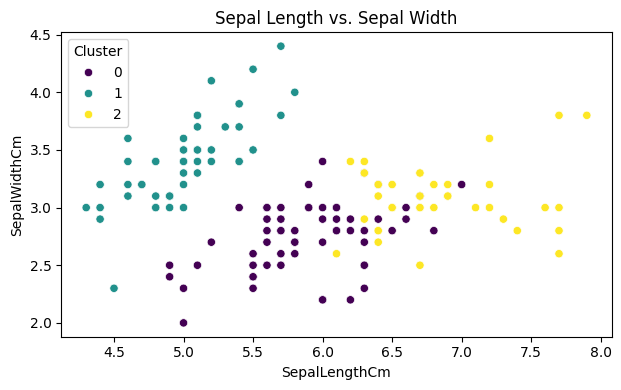

In [19]:
# 3.Scatter Plots
import seaborn as sns
plt.figure(figsize=(12, 4))

# Scatter Plot: Sepal Length vs. Sepal Width
plt.subplot(1, 2, 1)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=data, palette='viridis')
plt.title('Sepal Length vs. Sepal Width')
plt.tight_layout()
plt.show()

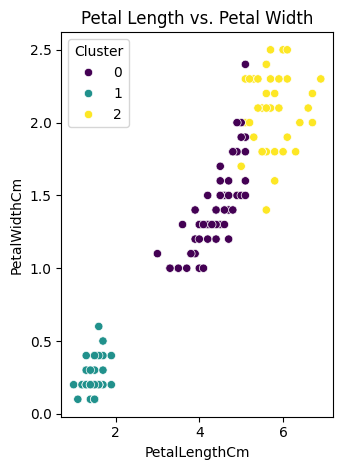

In [20]:
# Scatter Plot: Petal Length vs. Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', data=data, palette='viridis')
plt.title('Petal Length vs. Petal Width')

plt.tight_layout()
plt.show()

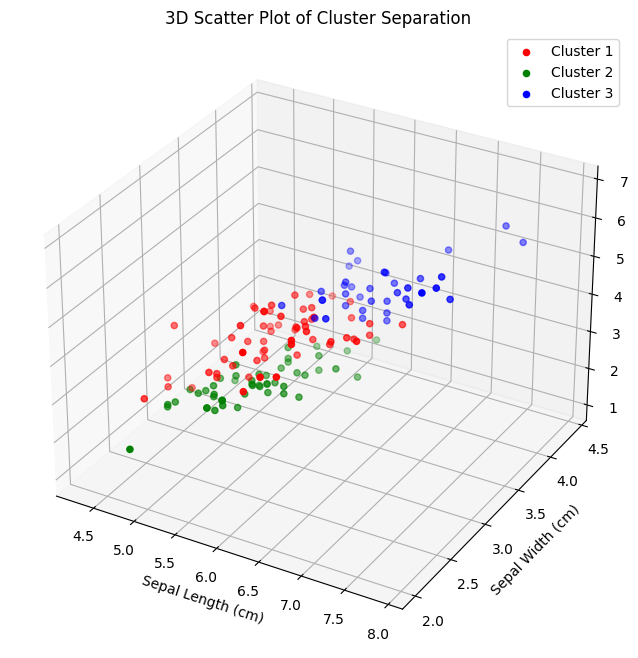

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster (you can modify this depending on your cluster labels)
colors = ['r', 'g', 'b']

# Iterate through clusters and plot data points
for cluster_label, color in zip(range(optimal_k), colors):
    cluster_data = data[data['Cluster'] == cluster_label]
    ax.scatter(cluster_data['SepalLengthCm'], cluster_data['SepalWidthCm'], cluster_data['PetalLengthCm'], c=color, label=f'Cluster {cluster_label + 1}')

# Customize the plot
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of Cluster Separation')
ax.legend()

# Show the plot

plt.show()

